<a href="https://colab.research.google.com/github/rogersm92/Machine_Learning/blob/main/Data_Science_Phone_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# basic imports for this Jupyter Notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [155]:
training_filepath = "/content/sample_data/phone_train.csv"
testing_filepath = "/content/sample_data/phone_test.csv"

train_dataframe = pd.read_csv(training_filepath)
testing_dataframe = pd.read_csv(testing_filepath)


In [156]:
train_dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [157]:
train_dataframe.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [158]:
train_dataframe["price_range"].head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [159]:
# Count the values of different classes
train_dataframe['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [160]:
# Training data info
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

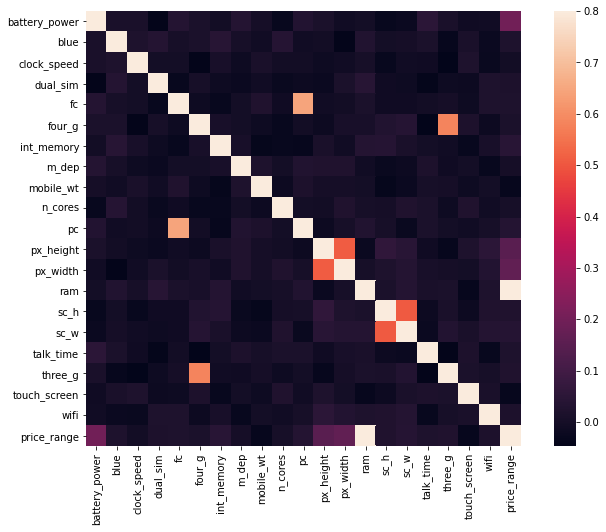

In [185]:
#correlation matrix
corrmat = train_dataframe.corr() # Compute pairwise correlation of columns, excluding NA/null values.
f, ax = plt.subplots(figsize=(12, 8)) # plt.subplots() means Number of rows/columns of the subplot grid.
sns.heatmap(corrmat, vmax=.8, square=True); 
# Thanks to this heatmap, we can see that the price range depends mostly on RAM, battery power and screen size

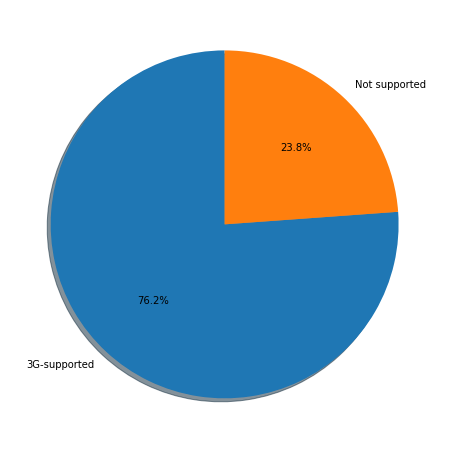

In [194]:
labels = ["3G-supported",'Not supported']
values=train_dataframe['three_g'].value_counts().values

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8, 8)
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

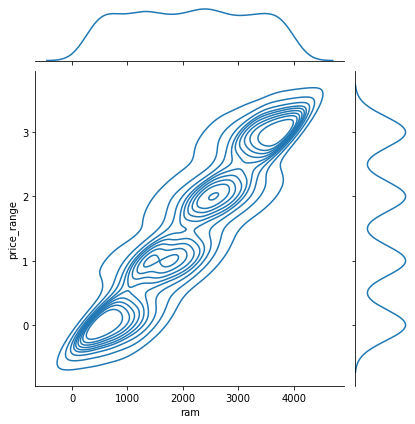

In [196]:
sns.jointplot(x='ram',y='price_range',data=train_dataframe,kind='kde');

In [164]:
X= train_dataframe.drop('price_range',axis=1)
y= train_dataframe['price_range']

In [165]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [166]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [167]:
# Split the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [182]:
from sklearn.neighbors import KNeighborsClassifier
# Create model and fit it
knn = KNeighborsClassifier(n_neighbors=10) # The k-nearest neighbors (KNN) algorithm can be used to solve both classification and regression problems. 

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

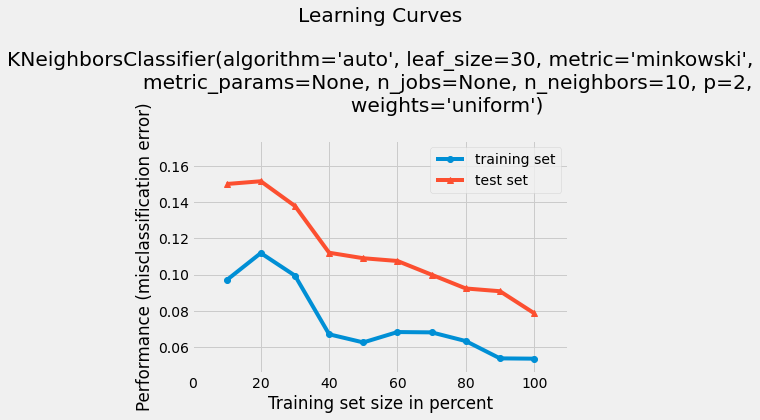

In [183]:
# Plotting the learning curve
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

In [184]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.92


In [171]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[157   1   0   0]
 [  6 143   3   0]
 [  0  20 169  10]
 [  0   0  12 139]]


In [172]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
           1       0.87      0.94      0.91       152
           2       0.92      0.85      0.88       199
           3       0.93      0.92      0.93       151

    accuracy                           0.92       660
   macro avg       0.92      0.93      0.92       660
weighted avg       0.92      0.92      0.92       660



In [174]:
pred[:20]

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [175]:
y_test[:20]

1458    1
198     1
1276    2
1243    1
1267    1
201     1
903     2
295     1
1333    1
236     1
1842    0
1356    1
218     1
1406    1
1391    1
1412    0
1307    0
1499    2
423     0
1435    1
Name: price_range, dtype: int64

In [178]:
knn.score(X_test,y_test)

0.9212121212121213

Text(0, 0.5, 'Error Rate')

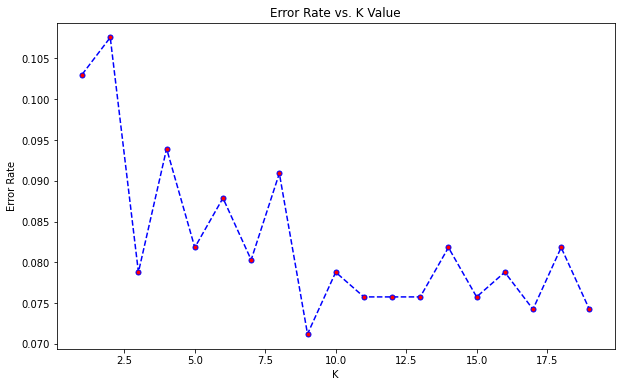

In [179]:
# Error rate vs K value
# K is just the number of neighbors "voting" on the test example's class.
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')    